# Spring2024_Airbnb_Dataset_Analysis_with_Pandas


## Technology Description

### Pandas

**What it does:**
Pandas is a powerful Python library for data manipulation and analysis, providing data structures and operations for manipulating numerical tables and time series.

**Why it's different:**
Unlike basic Python data structures, pandas is specifically designed for data analysis. It supports heterogeneous data, handles missing data fluently, and provides comprehensive tools for reshaping, merging, and aggregating data.

**Pros:**
- Efficient handling of large datasets.
- Comprehensive set of features for data manipulation and analysis.
- Integrates well with other libraries in the Python.

**Cons:**
- High memory usage for large datasets.

**Related to class studies:**
Pandas applies concepts from statistics and programming covered in our class, providing practical tools for real-world data analysis tasks.

### Tkinter

**What it does:**
Tkinter is the standard GUI library for Python, providing a powerful object-oriented interface to the Tk GUI toolkit.

**Why it's different:**
Tkinter is part of Python's standard library and is simple enough for beginning programmers to use quickly, yet robust enough for complex GUI development.

**Pros:**
- Easily accessible.
- Sufficiently flexible for most small project requirements.
- Well-documented and supported by a large community.

**Cons:**
- Not as modern or feature-rich as more specialized GUI frameworks like PyQt or Electron.
- GUIs created are often less attractive compared to other frameworks.

**Related to class studies:**
Tkinter allows us to apply event-driven programming concepts discussed in class to develop real-world applications.

### Matplotlib

**What it does:**
Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications.

**Why it's different:**
Matplotlib is highly customizable and can produce a wide variety of plots and charts. It can be used in Python scripts, the Python and IPython shells, web application servers, and various graphical user interface toolkits.

**Pros:**
- Powerful, capable of creating complex visualizations.
- Well-integrated into the Python ecosystem.
- Large community and extensive documentation.

**Cons:**
- Can be verbose for some simple plotting tasks.
- Steeper learning curve compared to libraries like Seaborn or Plotly.

**Related to class studies:**
Matplotlib reinforces the data visualization concepts taught in our course, illustrating how to present data effectively.

### Sources:
- Pandas documentation (https://pandas.pydata.org/)
- Tkinter overview at Python.org (https://docs.python.org/3/library/tkinter.html)
- Matplotlib user guide (https://matplotlib.org/)


## Docker System Design

This document explains the Docker system architecture and the rationale behind the configurations used for the Airbnb dataset analysis project. The setup includes a `Dockerfile` and a `docker-compose.yml` file.

### Dockerfile Details

```dockerfile
# Base Image
FROM python:3.9-slim

# Set the Working Directory
WORKDIR /app

# Copy local code to the container
COPY . /app

# Install Python dependencies
RUN pip install --no-cache-dir pandas matplotlib

# Install tkinter for GUI support
RUN apt-get update && apt-get install -y tk \
    && rm -rf /var/lib/apt/lists/*

# Command to run on container start
CMD ["python", "./FinalProject/KayiWong605.py"]
```
**Explanation:**
- **Base Image:** Uses Python 3.9-slim, which is lightweight yet sufficient for running Python applications, optimizing the container size.
- **Working Directory:** Sets /app as the directory where all commands will run, simplifying file management within the container.
- **Copying Files:** Transfers the local project files into the container to ensure all necessary scripts and resources are available.
- **Dependencies:** Installs pandas for data manipulation and matplotlib for plotting, essential for the project's data analysis tasks.
- **Tkinter Installation:** Includes tkinter to manage GUI components from within the Docker environment.
- **Startup Command:** Specifies the Python script to run when the container starts, initiating the project's main functionality.

### docker-compose.yml Configuration

```yml
services:
  app:
    build: .
    volumes:
      - .:/app
    environment:
      - DISPLAY=host.docker.internal:0
    ports:
      - "8000:8000"
```

**Components:**
- **Services:** Defines the app service.
- **Build Context:** Uses the Dockerfile in the current directory to build the image.
- **Volumes:** Maps the current directory to /app in the container, enabling real-time code updates without rebuilding the container.
- **Environment Variables:** Configures the DISPLAY for GUI output, allowing it to appear on the host machine.
- **Port Mapping:** Exposes port 8000 on both the host and container, useful for any web services.


## Running the Docker Container System

This guide outlines the process for running the Docker container system configured for the Airbnb dataset analysis project. It includes command-line instructions and details on understanding the output.

### Start the System

To launch the system,I execute the following command under the directory of my porject file in my terminal:

```bash
docker-compose -p myproject up --build
```

### Dockerfile Output
When I run the system, below are several lines of output in my terminal, which indicate the steps Docker is taking to set up and start the container. Here's a breakdown of the significant parts of the output:

```bash
[+] Building 30.6s (10/10) FINISHED                        
 => [internal] load build definition from Dockerfile                   
 => [internal] load .dockerignore                                      
 => [internal] load metadata for docker.io/library/python:3.9-slim     
 => CACHED [1/5] FROM docker.io/library/python:3.9-slim@sha256:44122e46edb1c
 => [internal] load build context                                      
 => [2/5] COPY . /app                                                  
 => [3/5] RUN pip install --no-cache-dir pandas matplotlib             
 => [4/5] RUN apt-get update && apt-get install -y tk                  
 => [5/5] exporting to image                                           
[+] Running 0/1                                                           
 ⠋ Container myproject-app-1  Recreated                               
Attaching to app-1
```
### Key Points in the Output
- **Building the image:** Shows each step in the Dockerfile being executed, from loading the base image to installing dependencies.
- **Running the container:** Indicates that the container has been created and started.


### Analytical Output
After the container starts, it executes the Python script. Here are some of the highlights from the application's output:
```bash
Weekdays with above-average reservations:
Monday       26539
Thursday     26589
Tuesday      24275
Wednesday    24082

10 most common room amenities:
Air conditioning            161054
In-room safe box            161054
Free Wi-Fi in all rooms!    157613

10 least common room amenities:
Wi-Fi [free]                196
In-room tablet              161
Air purifier                103

Percentage of each room amenity of the total num of reservations:
Air conditioning            97.094765%
In-room safe box            97.094765%
Free Wi-Fi in all rooms!    95.020287%

Average Onsite Price by Max Occupancy:
1 person:  $134.36
2 people:  $130.92
3 people:  $162.07
...
16 people: $1329.19
17 people: $1595.29
```
This output provides insights from the analysis of the Airbnb dataset, such as reservation trends, popular amenities, and pricing information based on room occupancy.


## Detailed Project Description
Next I will explain my python file in detail, including what tools did I reference and what data analysis was performed

### Initial Setup

In [1]:
import numpy as np
import pandas as pd
import tkinter as tk
import matplotlib
import matplotlib.pyplot as plt

### CSV file used
`Property_details.csv`: Contains Airbnb property information such as  property name, address, zip code, etc.

`Order_details.csv`: Contains Airbnb order details such as reservation date, number of guests, roomtype, etc.

In [2]:
Property_details = pd.read_csv('./Property_details.csv', index_col=0, encoding='utf-8')
Order_details = pd.read_csv('./Order_details.csv', index_col=0, encoding='ISO-8859-1')

In [3]:
Property_details.head()

,propertyname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,url
propertyid,,,,,,,,,,
1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,https://www.booking.com/hotel/hr/bungalow-luxu...
177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,https://www.agoda.com/en-gb/hotel-polonia/hote...
1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,http://www.booking.com/hotel/it/rifugio-sass-b...
177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,https://www.agoda.com/en-gb/madalena-hotel/hot...
1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,http://www.booking.com/hotel/it/pension-morenf...


In [4]:
Order_details.head()

,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,sourceurl,roomamenities,maxoccupancy,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected
id,,,,,,,,,,,,,,,,,,,,
50677497,634876,10/12/2019 15:46,11/2/2019,1,1,Double Room,82.36,"Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed",Cancellation policy,https://www.agoda.com/en-gb/the-old-cider-hous...,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,1,Y,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019
50672149,8328096,10/12/2019 15:47,11/30/2019,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,https://www.agoda.com/en-gb/pantlleni/hotel/be...,Air conditioning: ;Closet: ;Fireplace: ;Free W...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019
50643430,8323442,10/12/2019 15:47,12/20/2019,1,1,Vacation Home,591.74,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),https://www.agoda.com/en-gb/willow-cottage/hot...,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.166.122:80,NaN,NaN,10/13/2019
50650317,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,881.48,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),https://www.agoda.com/en-gb/apollo-hotel-londo...,Air conditioning: ;Clothes rack: ;Coffee/tea m...,1,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,NaN,NaN,10/13/2019
50650318,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,897.53,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),https://www.agoda.com/en-gb/apollo-hotel-londo...,Air conditioning: ;Clothes rack: ;Coffee/tea m...,3,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,Free breakfast for {3},NaN,10/13/2019


### Objectives
I investigated several questions regarding the Airbnb Dataset. I am going to go through each question by demonstrating the code and results.

**1.Find weekdays with above-average reservations**

In [5]:
# Create a new column called "weekday", which is the day of the “reservation date” in one week
Order_details['reservation date'] = pd.to_datetime(Order_details['reservation date']) 
Order_details['weekday'] = Order_details['reservation date'].dt.day_name()
# Find weekdays with above-average reservations
wkday_reservations = Order_details.groupby('weekday')['weekday'].count()
wkday_reservations.head()
avg_reservations = wkday_reservations.mean()
avg_reservations
above_avg_weekdays=wkday_reservations[wkday_reservations > avg_reservations]
print("Weekdays with above-average reservations:")
print(above_avg_weekdays)

Weekdays with above-average reservations:
weekday
Monday       26539
Thursday     26589
Tuesday      24275
Wednesday    24082
Name: weekday, dtype: int64


**2.Find 10 most & least common room amennities and their percentage of total reservations**

In [6]:
amenities=Order_details['roomamenities'].str.split(': ;').dropna()
amenity_counts=pd.Series([amenity for sublist in amenities for amenity in sublist if amenity]).value_counts()

top_10_common=amenity_counts.head(10)

least_10_common=amenity_counts.tail(10)

print("10 most common room amenities:")
print(top_10_common)
print("\n10 least common room amenities:")
print(least_10_common)

amenity_percentage=(amenity_counts/len(Order_details))*100

print("\nPercentage of each room amenity of the total num of reservations:")
print(amenity_percentage)

10 most common room amenities:
Air conditioning            161054
In-room safe box            161054
Free Wi-Fi in all rooms!    157613
Hair dryer                  127316
Toiletries                  119993
Heating                     119196
Desk                        114593
Telephone                   113827
Closet                      113368
Towels                      106225
dtype: int64

10 least common room amenities:
Wi-Fi [free]                196
In-room tablet              161
Air purifier                103
First aid kit                98
Internet access ï¿?LAN       72
TV [in bathroom]             58
Humidifier                   45
Vending machine              24
Hot tub                      13
Open air bath privileges     12
dtype: int64

Percentage of each room amenity of the total num of reservations:
Air conditioning            97.094765
In-room safe box            97.094765
Free Wi-Fi in all rooms!    95.020287
Hair dryer                  76.755108
Toiletries           

**3.Find Max and Min onsite price for each property**

In [7]:
# Some 'onsiteprice' are marked as 0, which is wrong. I created a new column called 'replaced onsiteprice'. This column replaces the 0 value with median of non-zero “onsiteprice”.
# For each property, I calculated the maximum and minimum value of “replaced onsiteprice” and put them in "Maximum" and "Minimum".I stored them in 'Max_Min_Price.csv'.
price_NonZero=Order_details.loc[Order_details['onsiteprice']!=0]
price_NonZero['replaced onsiteprice']=price_NonZero.onsiteprice.copy()
median_non=price_NonZero.groupby(by='propertycode')['onsiteprice'].median()

price_Zero=Order_details.loc[Order_details['onsiteprice']==0]
price_Zero=pd.merge(price_Zero,median_non,how='left',on='propertycode')
price_Zero.rename(columns={'onsiteprice_y':'replaced onsiteprice'},inplace=True)
price_all=pd.concat([price_NonZero,price_Zero])
price_all.drop('onsiteprice_x',axis=1,inplace=True)

P_4=price_all.groupby(by=['propertycode'])
agg_4=P_4.agg(Minimum=('replaced onsiteprice',np.min),Maximum=('replaced onsiteprice',np.max))
agg_4.to_csv('Max_Min_Price.csv')
agg_4

/var/folders/ng/cw3z67hs4x7g5dlxvdtwb_z40000gn/T/ipykernel_18171/2592227452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_NonZero['replaced onsiteprice']=price_NonZero.onsiteprice.copy()


,Minimum,Maximum
propertycode,,
31,219.52,374.73
56,73.46,149.51
97,259.76,468.83
138,169.66,321.84
147,122.90,226.18
...,...,...
8965616,79.37,109.50
8965903,176.03,176.03
8970542,50.23,60.28


**4.Find average star rating for each country**

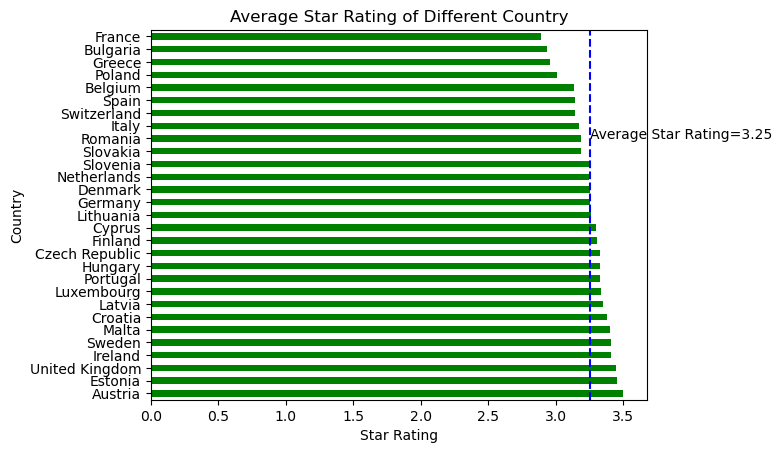

In [8]:
country_rating=(Property_details
                  .groupby('country')['starrating']
                  .mean()
                  .sort_values(ascending=False)
                  .reset_index())
fig,ax=plt.subplots()
country_rating.plot(kind='barh',x='country',y='starrating', color='g', ax=ax)

ax.set_title('Average Star Rating of Different Country')
ax.set_xlabel('Star Rating')
ax.set_ylabel('Country')

average_rating=country_rating['starrating'].mean()
ax.axvline(x=average_rating,color='b',linestyle='--',label='Average')

ax.annotate(f'Average Star Rating={average_rating:.2f}',xy=(average_rating,20))

ax.legend().set_visible(False)

plt.show()

**5.Find the 5 most popular room types and their repective proportion**

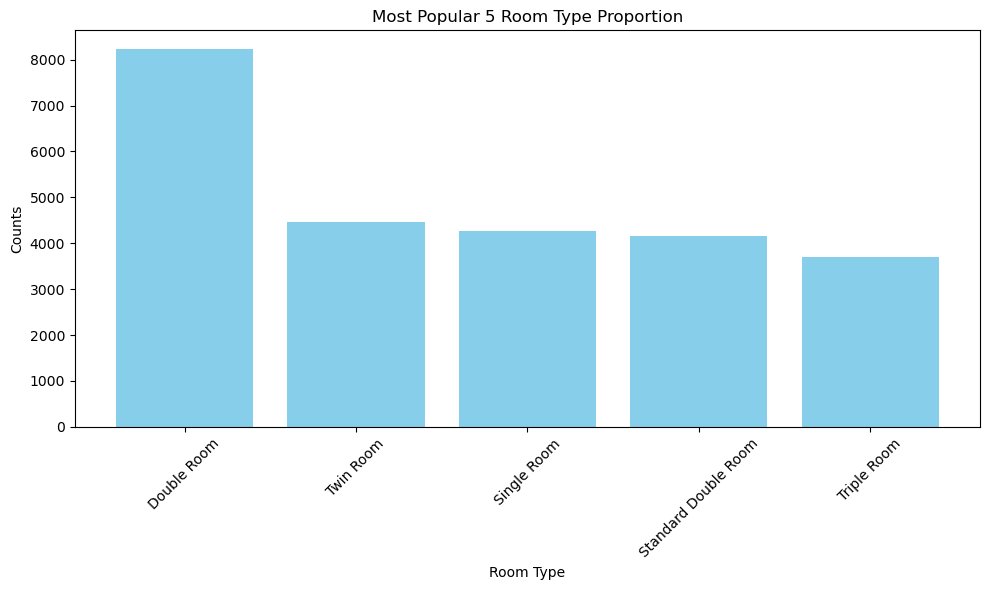

In [9]:
roomtype_num_most=(Order_details.groupby('roomtype')['propertycode'].count().sort_values(ascending=False).reset_index().head(5))
total_orders=Order_details['propertycode'].count()
roomtype_num_most['proportion']=roomtype_num_most['propertycode']/total_orders
roomtype_num_most

room_counts=roomtype_num_most['propertycode']
room_labels=roomtype_num_most['roomtype']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(room_labels, room_counts, color='skyblue')
ax.set_title('Most Popular 5 Room Type Proportion')
ax.set_xlabel('Room Type')
ax.set_ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

**6.Find average discount in each month**

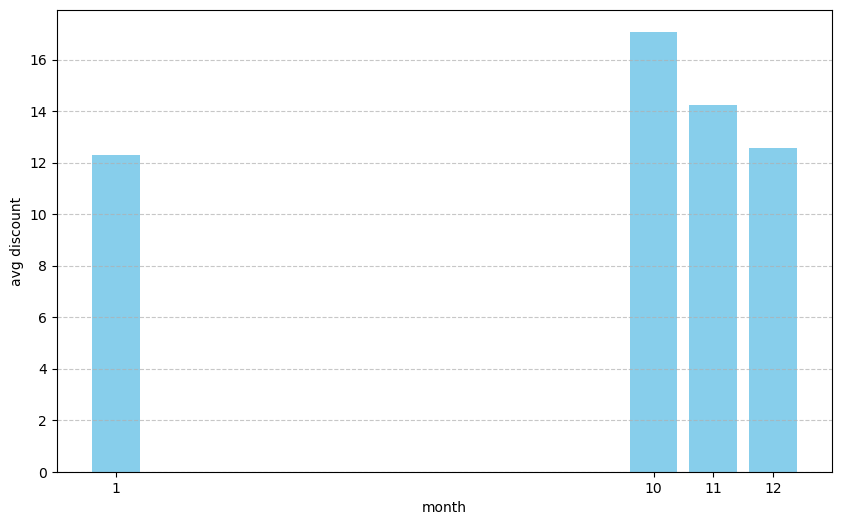

In [10]:
Month_discount=(Order_details
                  .groupby(Order_details['reservation date'].dt.month)
                  .discount
                  .mean()
                  .reset_index()
                  .rename(columns={'reservation date':'Month','discount':'Average Discount'})
                  .sort_values(by='Average Discount',ascending=False))
Month_discount

plt.figure(figsize=(10, 6))
plt.bar(Month_discount['Month'], Month_discount['Average Discount'], color='skyblue')
plt.xlabel('month')
plt.ylabel('avg discount')
plt.xticks(Month_discount['Month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**7.Find top 5 countries with properties having star rating over 3.5**

Italy             6196
United Kingdom    5743
Germany           3768
Spain             3449
France            3078
Name: country, dtype: int64


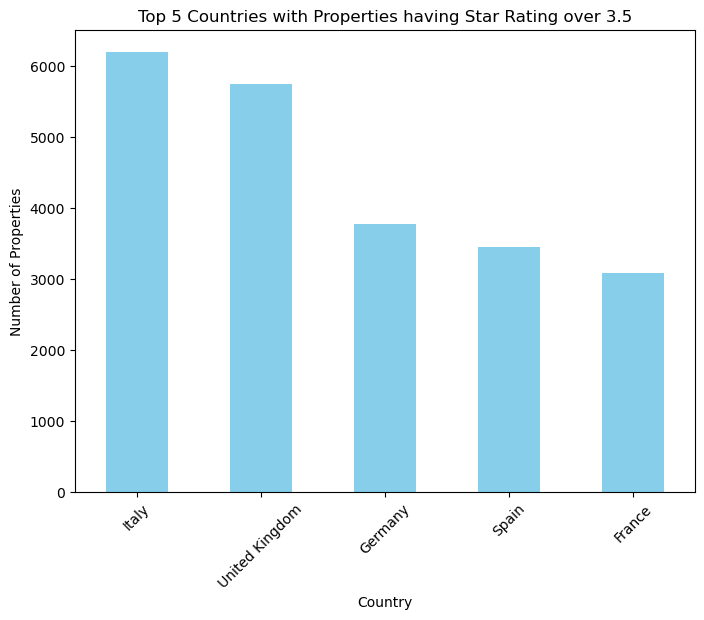

In [11]:
properties_above_3_5 = Property_details[Property_details['starrating'] > 3.5]
top_countries = properties_above_3_5['country'].value_counts().head(5)
print(top_countries)

plt.figure(figsize=(8, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with Properties having Star Rating over 3.5')
plt.xlabel('Country')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()

**8.Find the average on site price of each room occupancy**

    maxoccupancy  Average Onsite Price
0              1            134.361126
1              2            130.921254
2              3            162.069487
3              4            201.003857
4              5            220.171603
5              6            294.407138
6              7            377.277143
7              8            411.410448
8              9            378.477333
9             10            679.577000
10            11            512.740000
11            12            934.019091
12            13            746.952000
13            14            533.357500
14            15            665.156667
15            16           1329.190000
16            17           1595.290000
17            20            221.020000
18            24            938.925000


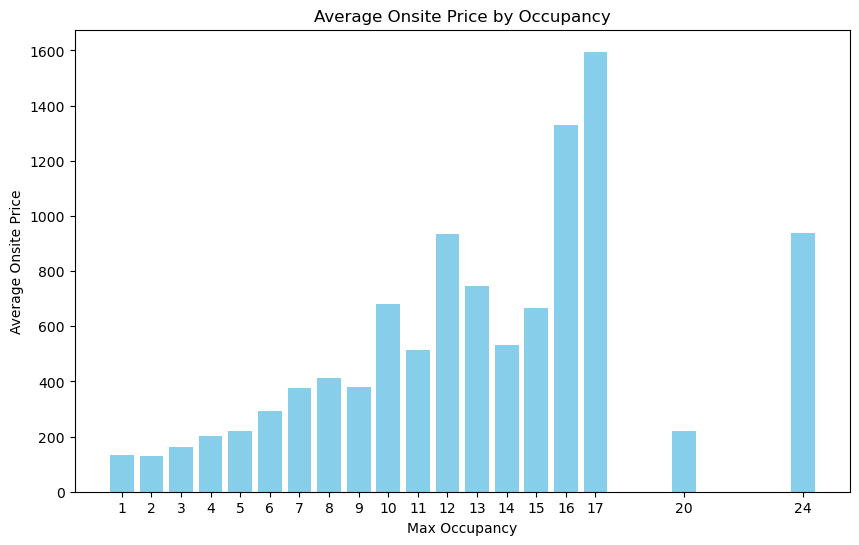

In [12]:
average_price_per_occupancy = Order_details.groupby('maxoccupancy')['onsiteprice'].mean().reset_index()
average_price_per_occupancy = average_price_per_occupancy.rename(columns={'onsiteprice': 'Average Onsite Price'})
print(average_price_per_occupancy)

plt.figure(figsize=(10, 6))
plt.bar(average_price_per_occupancy['maxoccupancy'], average_price_per_occupancy['Average Onsite Price'], color='skyblue')
plt.xlabel('Max Occupancy')
plt.ylabel('Average Onsite Price')
plt.title('Average Onsite Price by Occupancy')
plt.xticks(average_price_per_occupancy['maxoccupancy'])
plt.show()